 # Project description
 #### Author: Daniel Trzópek

The target of this project is creation of a machine learning model, that will be able to predict occuring of the diabetes of the female patients. Used dataset is based on the Pima Indians Diabetes Database.
The data consist of many variables, such as:
- number of pregnancies
- glucose level
- blood pressure
- age, BMI, insulin level and others

Generally enclosed data consists of many factors that might influcence the occuring of the diabetes.

The following project will be split into several sections.
The analysis and conclusions will be involved in the shape of markdown cells, and the code parts will be commented in the code cells.

In [1]:
# Libraries import
import numpy as np
import pandas as pd

## 1. Data processing and data analysis

In [32]:
# Loading the data
def load_data(path=''):
    return pd.read_csv(path)

In [33]:
diabetes_df = load_data('diabetes.csv')
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Above we can see the data enclosed in the database. The last column is the given diagnosis:
- 1 - patient has diabetes
- 0 - patient is healthy

Below we will use indexes as our patients IDs.

In [39]:
diabetes_df_index = diabetes_df.shape[0]
diabetes_df['PatientID'] = np.arange(diabetes_df_index)
diabetes_df.set_index('PatientID', inplace=True)

In [41]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Based on the amount of the positive/negative outcomes we can notice, that we have almost twice as much data for the negative outcomes, which should result in better accuracy for predicting the negative outcomes.

Below we will use the .describe() method to see some general results based on our given data.

In [42]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###

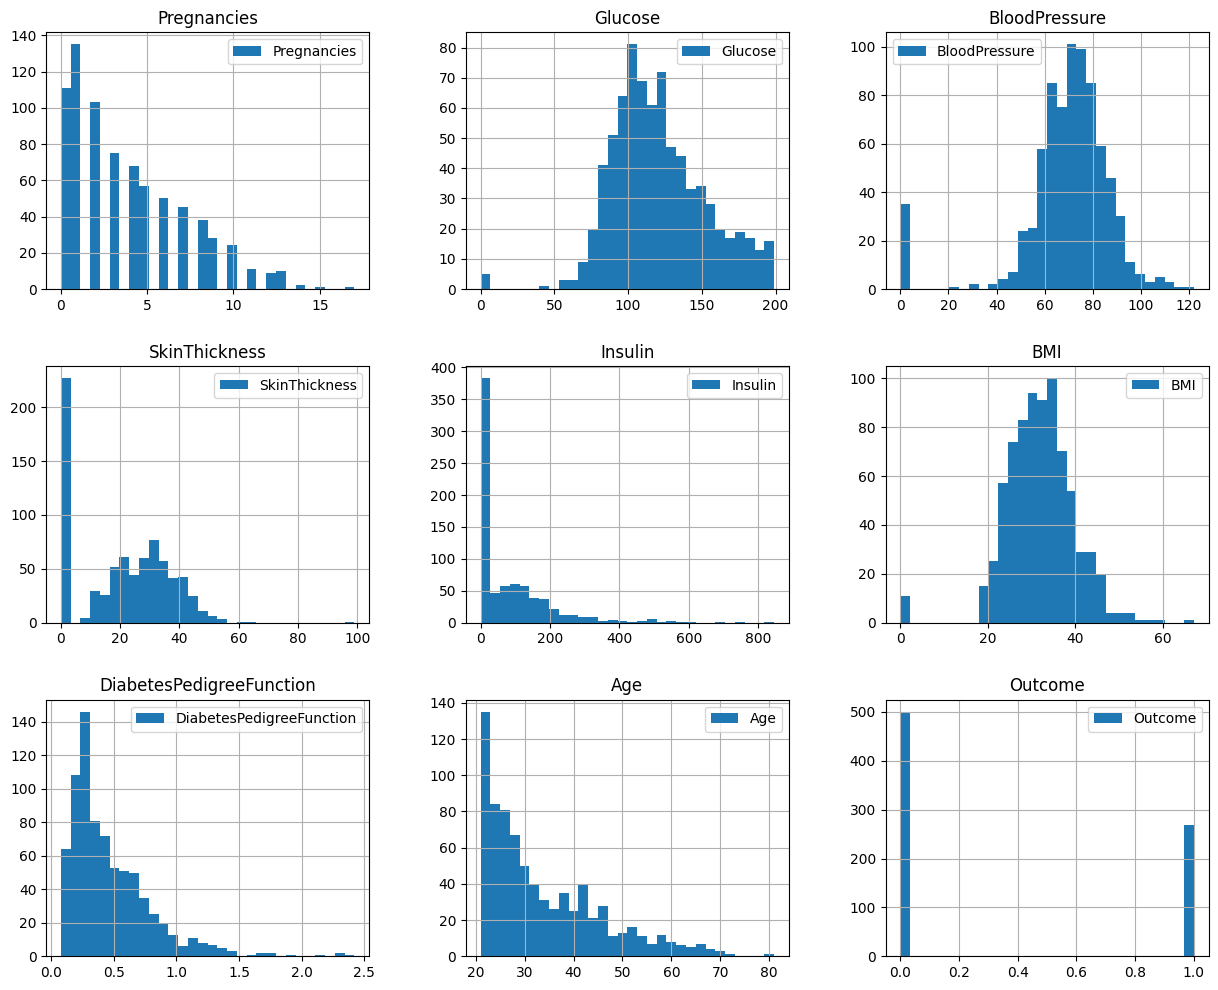

In [53]:
import matplotlib.pyplot as plt
diabetes_df.hist(bins=30, figsize=(15,12),legend=True)
plt.show()